In [6]:
# Cell 1: imports and helper function
import os
import csv
import numpy as np
from scipy.io import loadmat
from PIL import Image

def export_mat_as_png_and_csv(mat_path, out_dir, csv_path, img_var, angle_var):
    data = loadmat(mat_path)
    X = data[img_var]                # H×W×1×N
    angles = data[angle_var].ravel() # (N,)
    N = X.shape[3]

    os.makedirs(out_dir, exist_ok=True)

    with open(csv_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["filename", "angle"])
        for i in range(N):
            # extract image and force uint8
            img_arr = X[:, :, 0, i]
            # if float, assume it's already 0–255 or 0–1; scale/clamp then cast
            img_arr = np.clip(img_arr, 0, 255)
            img_uint8 = img_arr.astype(np.uint8)
            # save PNG
            fname = f"{i:05d}.png"
            Image.fromarray(img_uint8).save(os.path.join(out_dir, fname))
            # write label
            writer.writerow([fname, float(angles[i])])


In [7]:
# Cell 2: export train & test sets
export_mat_as_png_and_csv(
    mat_path="DigitsDataTrain.mat",
    out_dir="train_images",
    csv_path="train_labels.csv",
    img_var="XTrain",
    angle_var="anglesTrain"
)

export_mat_as_png_and_csv(
    mat_path="DigitsDataTest.mat",
    out_dir="test_images",
    csv_path="test_labels.csv",
    img_var="XTest",
    angle_var="anglesTest"
)

print("Export complete: train_images/, test_images/, train_labels.csv, test_labels.csv")


Export complete: train_images/, test_images/, train_labels.csv, test_labels.csv


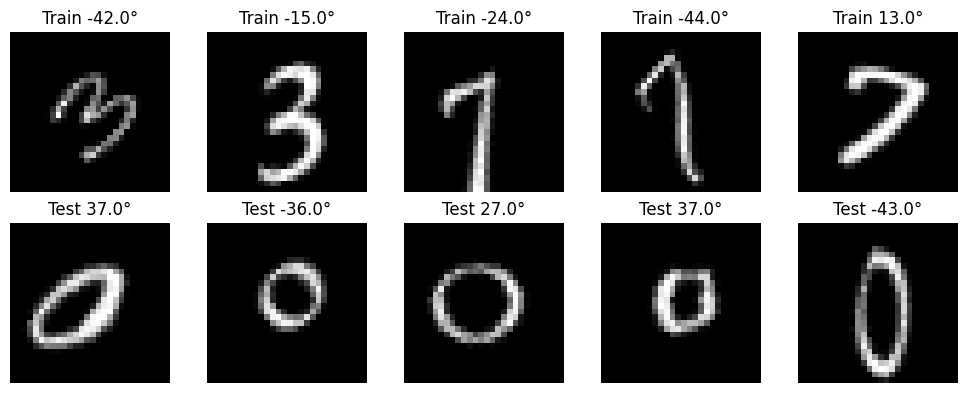

In [8]:
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load data
data_train = loadmat("DigitsDataTrain.mat")
data_test  = loadmat("DigitsDataTest.mat")
X_train = data_train['XTrain']      # shape: 28×28×1×5000
angles_train = data_train['anglesTrain'].ravel()
X_test  = data_test['XTest']        # shape: 28×28×1×5000
angles_test = data_test['anglesTest'].ravel()

# Number of samples to display
num_samples = 5

# Plot
fig, axes = plt.subplots(2, num_samples, figsize=(num_samples*2, 4))
for i in range(num_samples):
    axes[0, i].imshow(X_train[:, :, 0, i], cmap='gray')
    axes[0, i].set_title(f"Train {angles_train[i]:.1f}°")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_test[:, :, 0, i], cmap='gray')
    axes[1, i].set_title(f"Test {angles_test[i]:.1f}°")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()
